In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
datelist = pd.date_range(start="26-02-2020",periods = 43).tolist()

In [3]:
len(datelist)

43

In [4]:
novi = [1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 3, 0, 1, 0, 4, 6, 0, 5, 8, 11, 6, 28, 9, 29, 22, 12, 29, 24, 18, 22, 18, 26, 44, 25,
       30,46,53,72,15,29,18]

In [5]:
izleceni = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 9, 0, 5, 0, 
           3,0,3,7,0,5]

In [6]:
pocinati = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 2, 2, 0,
           1,5,1,3,5,3]

In [7]:
df = pd.DataFrame({'datum': datelist, 'novi_pozitivni':novi, 'vkupno_novi': np.zeros(len(novi)), 'izleceni': izleceni,'vkupno_izleceni': np.zeros(len(novi)), 'pocinati' : pocinati, 'vkupno_pocinati': np.zeros(len(novi)), 'active': np.zeros(len(novi))})

In [8]:
vkupno_novi = 0
vkupno_izleceni = 0
vkupno_pocinati = 0
active = 0
for i in range(len(novi)):
    vkupno_novi = vkupno_novi + df['novi_pozitivni'][i]
    vkupno_izleceni = vkupno_izleceni + df['izleceni'][i]
    vkupno_pocinati = vkupno_pocinati + df['pocinati'][i]
    active = vkupno_novi - (vkupno_izleceni+vkupno_pocinati)
    df['vkupno_novi'][i] = vkupno_novi
    df['vkupno_izleceni'][i] = vkupno_izleceni
    df['vkupno_pocinati'][i] = vkupno_pocinati
    df['active'][i] = active
df['vkupno_novi'] = df['vkupno_novi'].astype(int)
df['vkupno_izleceni'] = df['vkupno_izleceni'].astype(int)
df['vkupno_pocinati'] = df['vkupno_pocinati'].astype(int)
df['active'] = df['active'].astype(int)

/home/sinisha/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/sinisha/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/sinisha/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [9]:
df

,datum,novi_pozitivni,vkupno_novi,izleceni,vkupno_izleceni,pocinati,vkupno_pocinati,active
0,2020-02-26,1,1,0,0,0,0,1
1,2020-02-27,0,1,0,0,0,0,1
2,2020-02-28,0,1,0,0,0,0,1
3,2020-02-29,0,1,0,0,0,0,1
4,2020-03-01,0,1,0,0,0,0,1
5,2020-03-02,0,1,0,0,0,0,1
6,2020-03-03,0,1,0,0,0,0,1
7,2020-03-04,0,1,0,0,0,0,1
8,2020-03-05,0,1,0,0,0,0,1
9,2020-03-06,2,3,0,0,0,0,3


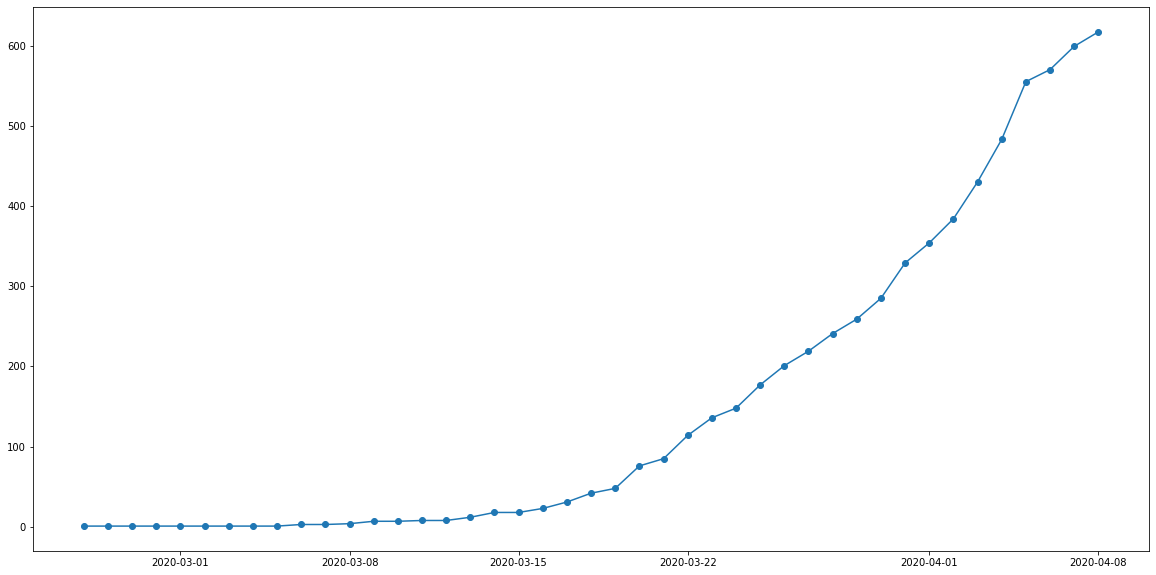

In [10]:
plt.figure(figsize=(20,10))
plt.plot(df['datum'],df['vkupno_novi'])
plt.scatter(df['datum'],df['vkupno_novi'])

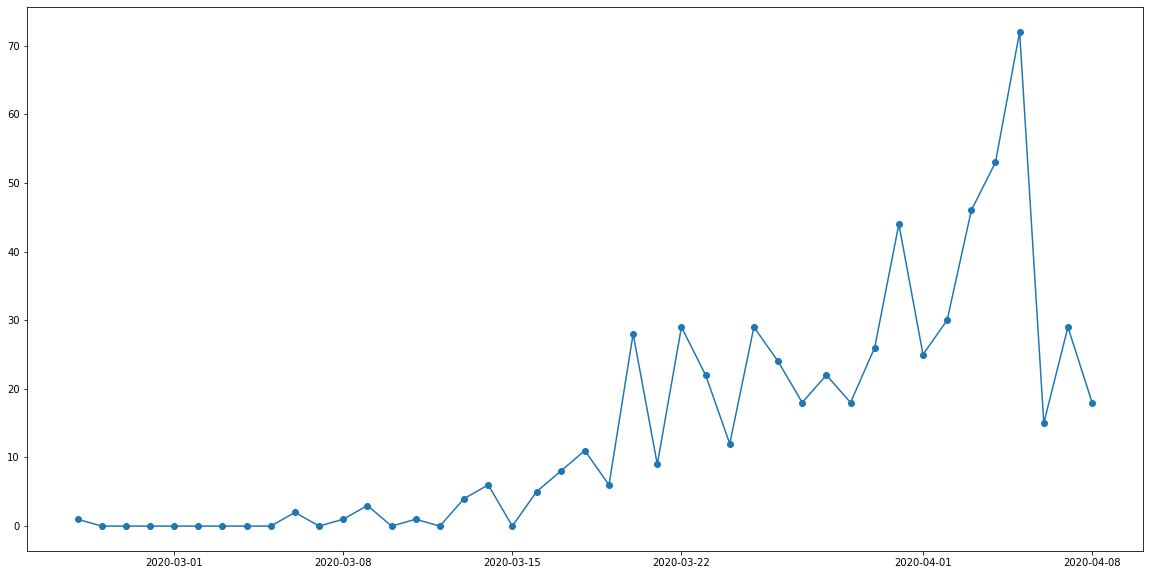

In [11]:
plt.figure(figsize=(20,10))
plt.plot(df['datum'],df['novi_pozitivni'])
plt.scatter(df['datum'],df['novi_pozitivni'])

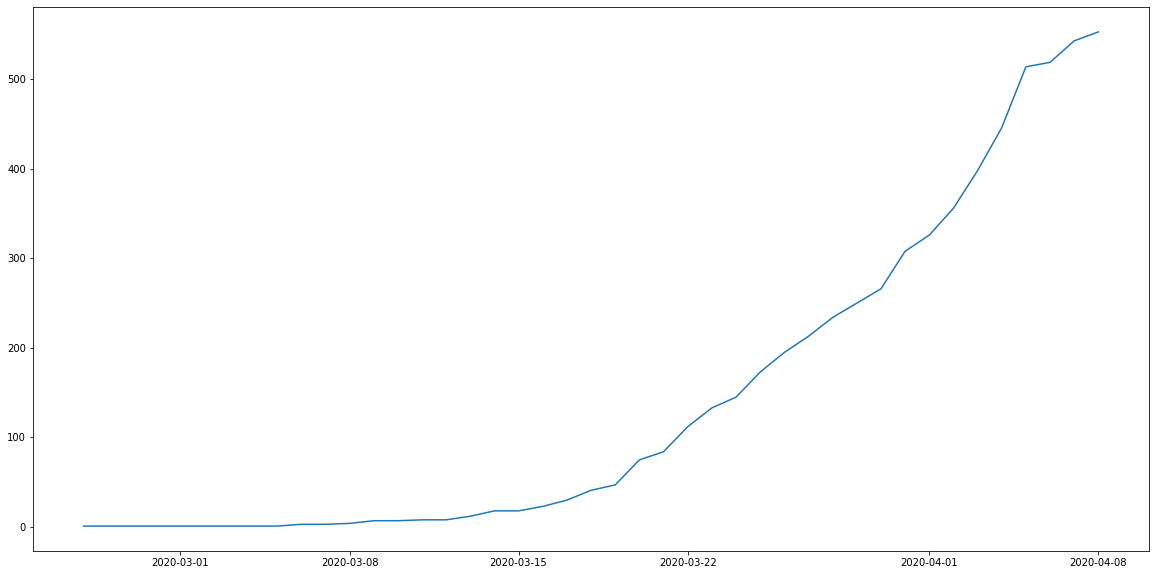

In [12]:
plt.figure(figsize=(20,10))
plt.plot(df['datum'],df['active'])

In [13]:
x_data = np.array(list(range(len(df))))
y_data = np.array(df['vkupno_novi'])
x = np.linspace(1,len(df),len(df))


In [14]:
kvadratni = np.polyfit(x_data,y_data, 2)

In [15]:
y = kvadratni[0]*(x_data**2) + kvadratni[1]*x_data + kvadratni[2]


In [16]:
def func(x, a, b, c):
    return a * np.exp(b * x) + c

In [17]:
def func_1(x, b):
    return np.exp(b * x)

In [18]:
popt, pcov = curve_fit(func, x_data, y_data)

In [19]:
popt1, pcov1 = curve_fit(func_1, x_data, y_data)

In [20]:
y_exp = func(x_data, *popt)

In [21]:
y_exp_1 = func_1(x_data, *popt1)

In [22]:
testirani = 2240 + 406 + 480 + 392 + 257 + 342 + 389 + 414 + 202
testirani

5122

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 7 Text major ticklabel objects>)

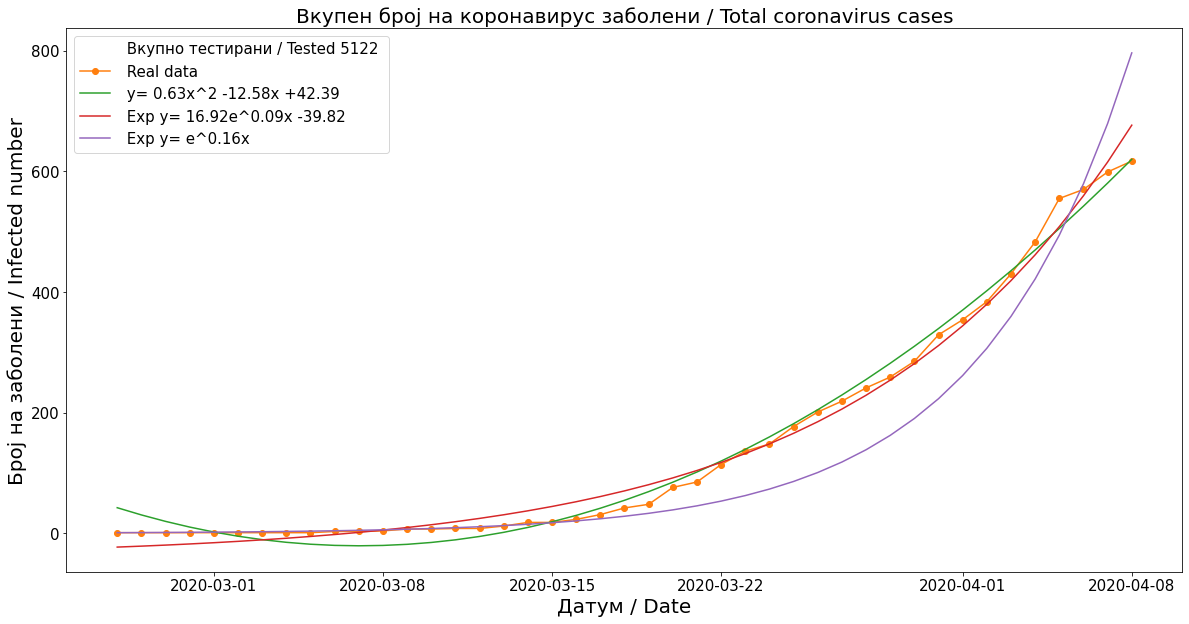

In [23]:
plt.figure(figsize=(20,10))
plt.plot([], [], ' ', label=" Вкупно тестирани / Tested %d " %testirani)
plt.plot(df['datum'],df['vkupno_novi'],'-o', label = ' Real data')
plt.plot(df['datum'],y, label = ' y= %2.2fx^2 %2.2fx %+2.2f' % tuple(kvadratni))
plt.plot(df['datum'], y_exp, label = ' Exp y= %2.2fe^%2.2fx %+2.2f' % tuple(popt))
plt.plot(df['datum'], y_exp_1, label = ' Exp y= e^%2.2fx' % tuple(popt1))
plt.legend(fontsize=15)
plt.title("Вкупен број на коронавирус заболени / Total coronavirus cases", fontsize=20)
plt.xlabel("Датум / Date", fontsize=20)
plt.ylabel("Број на заболени / Infected number", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


In [24]:
df.to_csv('corona_north_macedonia.csv',index=False)